# Support Vector Machine

***Function to track memory usage***

In [1]:
def mem_usage():
    pid = os.getpid()
    py = psutil.Process(pid)
    memory_use = py.memory_info()[0] / 2. ** 30
    return 'memory usage: ' + str(np.round(memory_use, 2)) + " GB\n"

****Importing SVM and other libarries****

In [2]:
# !pip install scikit-image --

In [3]:
from sklearn import datasets, metrics, svm
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
# import seaborn as sns
from skimage import io, transform
import numpy as np
# import pandas as pd

import time
import psutil
import os
import gc

Define functions to load data, convert to one-dimensional array (feature vector), then split into training and testing datasets

In [4]:
gc.collect();

dataset_dir = "/kaggle/input/alaska2-image-steganalysis"
classes = ["all three stego algorithms", "JMiPOD", "JUNIWARD", "UERD"]

# print("some cover images' paths: ", str(image_paths_cover[:10]))
# print("\nsome JMiPOD images' paths: ", str(image_paths_JMiPOD[:10]))
# print("\nsome JUNIWARD images' paths: ", str(image_paths_JUNIWRD[:10]))
# print("\nsome UERD images' paths: ", str(image_paths_UERD[:10]))

def collectImages(image_paths, images, labels):
    for image_path in image_paths:
        image = io.imread(image_path)
#         image = transform.resize(image, (512, 512), mode='constant')
        images.append(image)
        labels.append("cover" if "Cover" in image_path else "stego")
        
def defineData(stego_class, class_size):
    print(f"Binary classification between Cover and {stego_class} with {class_size} images")

    # # A list to store images
    images = []

    # # A list to store labels
    labels = []
    
    # # define paths of each image to be sampled
    image_paths_cover = [dataset_dir + "/Cover/" + image_path for image_path in os.listdir(dataset_dir + "/Cover/") if image_path.endswith(".jpg")][: class_size]
    collectImages(image_paths_cover, images, labels)

    if stego_class == "all three stego algorithms":
        image_paths_JMiPOD = [dataset_dir + "/JMiPOD/" + image_path for image_path in os.listdir(dataset_dir + "/JMiPOD/") if image_path.endswith(".jpg")][ : (class_size // 3)]
        image_paths_JUNIWRD = [dataset_dir + "/JUNIWARD/" + image_path for image_path in os.listdir(dataset_dir + "/JUNIWARD/") if image_path.endswith(".jpg")][(class_size // 3) : (2 * class_size // 3)]
        image_paths_UERD = [dataset_dir + "/UERD/" + image_path for image_path in os.listdir(dataset_dir + "/UERD/") if image_path.endswith(".jpg")][(2 * class_size // 3) : class_size]
        
        collectImages(image_paths_JMiPOD, images, labels)
        collectImages(image_paths_JUNIWRD, images, labels)
        collectImages(image_paths_UERD, images, labels)
    else:
        image_paths_stego = [dataset_dir + "/"+ stego_class + "/" + image_path for image_path in os.listdir(dataset_dir + "/" + stego_class +"/") if image_path.endswith(".jpg")][: class_size]

        collectImages(image_paths_stego, images, labels)

#     images = np.array([(x ,x ** 2) for x in images])  # creates an np array of shape (len(images), 1572864), returns accuracy of 16%
    images = np.array(images)
    labels = np.array(labels)

    n_samples = len(images)

    # Convert to vector
    data = images.reshape((n_samples, -1))
    print("\nvector shape:")
    print(data.shape)

    # flatten data
    for element in data:
        element = element / 255
    
    print(mem_usage())
    return data, labels
    
# print("\ntraining sets:")
# print("x training: ", str(X_train))
# print("y training: ", str(y_train))

**Let's create a SVM model, train it, and then make predictions on the test dataset.**

The support vector model will run with the creation of multiple support vector classifiers utilizing different kernals to create decision boundries of varying accuracy and results.

* Linear kernel
* Polynomial kernel
* RBF kernel

Binary classification between Cover and all three stego algorithms with 100 images

vector shape:
(200, 786432)
memory usage: 0.33 GB

Finished splitting the data
memory usage: 0.48 GB

Creating SVC from svm
memory usage: 0.48 GB

fitting SVC
memory usage: 1.3 GB

finished fitting SVC, testing SVC
memory usage: 1.3 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.58      0.58      0.58        31
       stego       0.55      0.55      0.55        29

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.57      0.57      0.57        60




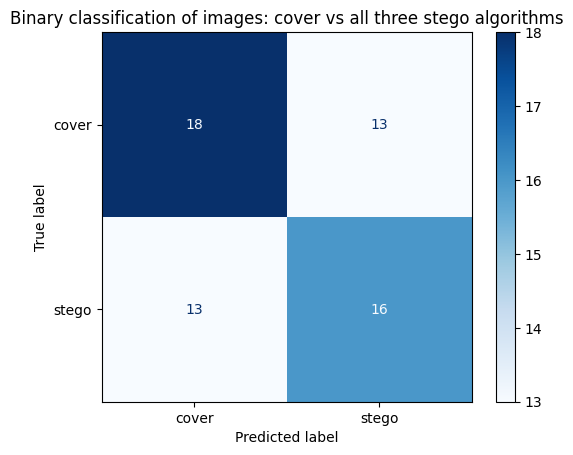

Accuracy:	56.67%
Binary classification between Cover and all three stego algorithms with 200 images

vector shape:
(400, 786432)
memory usage: 0.63 GB

Finished splitting the data
memory usage: 0.77 GB

Creating SVC from svm
memory usage: 0.77 GB

fitting SVC
memory usage: 2.41 GB

finished fitting SVC, testing SVC
memory usage: 2.41 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.43      0.43      0.43        54
       stego       0.53      0.53      0.53        66

    accuracy                           0.48       120
   macro avg       0.48      0.48      0.48       120
weighted avg       0.48      0.48      0.48       120




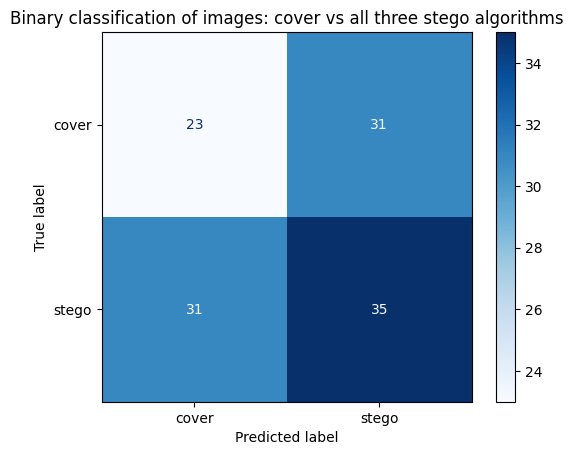

Accuracy:	48.33%
Binary classification between Cover and all three stego algorithms with 300 images

vector shape:
(600, 786432)
memory usage: 0.92 GB

Finished splitting the data
memory usage: 1.07 GB

Creating SVC from svm
memory usage: 1.07 GB

fitting SVC
memory usage: 3.53 GB

finished fitting SVC, testing SVC
memory usage: 3.53 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.43      0.53      0.47        79
       stego       0.55      0.45      0.49       101

    accuracy                           0.48       180
   macro avg       0.49      0.49      0.48       180
weighted avg       0.50      0.48      0.48       180




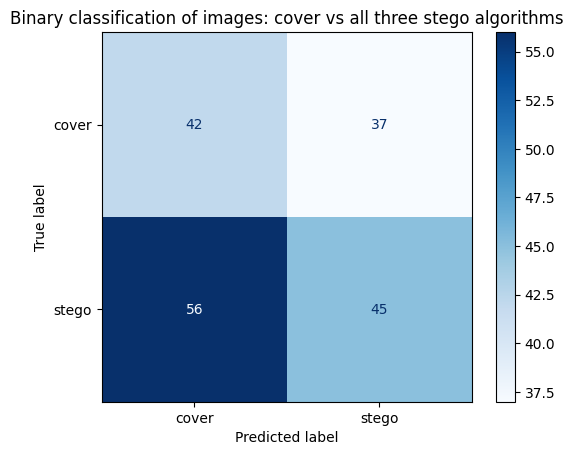

Accuracy:	48.33%
Binary classification between Cover and all three stego algorithms with 400 images

vector shape:
(800, 786432)
memory usage: 1.61 GB

Finished splitting the data
memory usage: 1.58 GB

Creating SVC from svm
memory usage: 1.58 GB

fitting SVC
memory usage: 4.87 GB

finished fitting SVC, testing SVC
memory usage: 4.87 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.52      0.50      0.51       126
       stego       0.47      0.49      0.48       114

    accuracy                           0.50       240
   macro avg       0.50      0.50      0.50       240
weighted avg       0.50      0.50      0.50       240




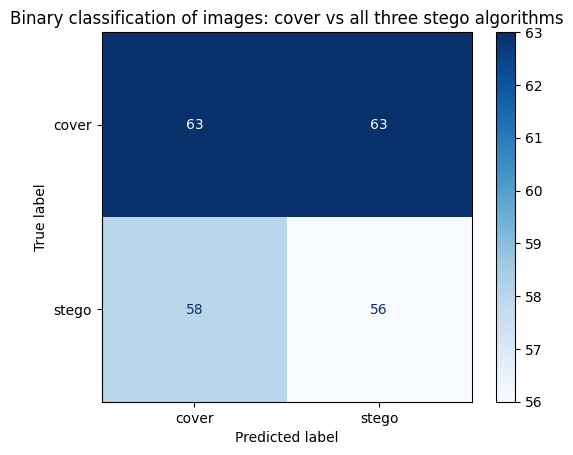

Accuracy:	49.58%
Binary classification between Cover and all three stego algorithms with 500 images

vector shape:
(1000, 786432)
memory usage: 1.9 GB

Finished splitting the data
memory usage: 1.83 GB

Creating SVC from svm
memory usage: 1.83 GB

fitting SVC
memory usage: 5.93 GB

finished fitting SVC, testing SVC
memory usage: 5.93 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.47      0.47      0.47       154
       stego       0.45      0.45      0.45       146

    accuracy                           0.46       300
   macro avg       0.46      0.46      0.46       300
weighted avg       0.46      0.46      0.46       300




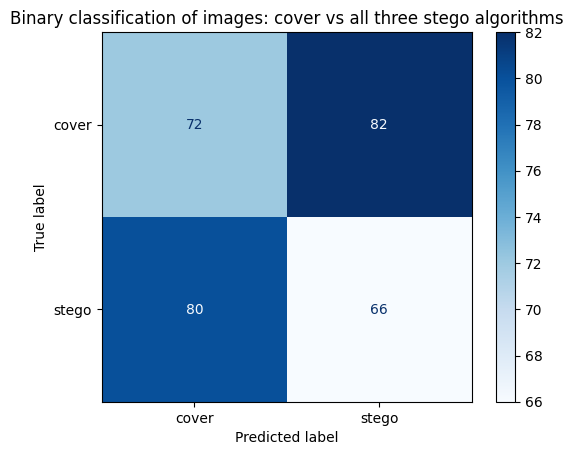

Accuracy:	46.00%
Binary classification between Cover and all three stego algorithms with 600 images

vector shape:
(1200, 786432)
memory usage: 2.2 GB

Finished splitting the data
memory usage: 2.08 GB

Creating SVC from svm
memory usage: 2.08 GB

fitting SVC
memory usage: 6.99 GB

finished fitting SVC, testing SVC
memory usage: 6.99 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.49      0.66      0.56       174
       stego       0.52      0.35      0.42       186

    accuracy                           0.50       360
   macro avg       0.51      0.51      0.49       360
weighted avg       0.51      0.50      0.49       360




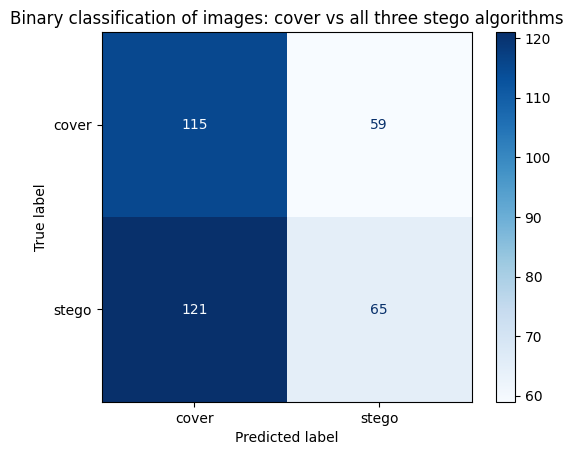

Accuracy:	50.00%
Binary classification between Cover and all three stego algorithms with 700 images

vector shape:
(1400, 786432)
memory usage: 2.49 GB

Finished splitting the data
memory usage: 2.33 GB

Creating SVC from svm
memory usage: 2.33 GB

fitting SVC
memory usage: 8.06 GB

finished fitting SVC, testing SVC
memory usage: 8.06 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.47      0.61      0.53       202
       stego       0.50      0.36      0.42       218

    accuracy                           0.48       420
   macro avg       0.48      0.49      0.48       420
weighted avg       0.49      0.48      0.47       420




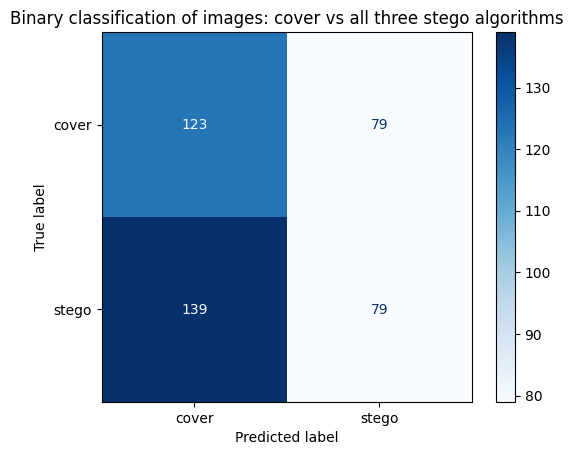

Accuracy:	48.10%
Binary classification between Cover and all three stego algorithms with 800 images

vector shape:
(1600, 786432)
memory usage: 2.78 GB

Finished splitting the data
memory usage: 2.57 GB

Creating SVC from svm
memory usage: 2.57 GB

fitting SVC
memory usage: 9.13 GB

finished fitting SVC, testing SVC
memory usage: 9.13 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.48      0.55      0.51       233
       stego       0.50      0.43      0.46       247

    accuracy                           0.49       480
   macro avg       0.49      0.49      0.49       480
weighted avg       0.49      0.49      0.49       480




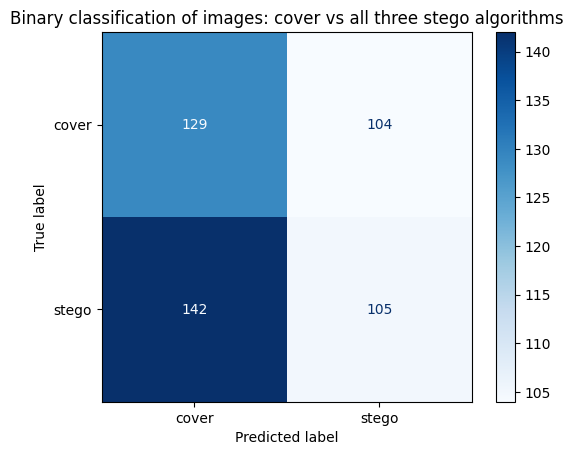

Accuracy:	48.75%
Binary classification between Cover and all three stego algorithms with 900 images

vector shape:
(1800, 786432)
memory usage: 3.08 GB

Finished splitting the data
memory usage: 3.22 GB

Creating SVC from svm
memory usage: 3.22 GB

fitting SVC
memory usage: 10.6 GB

finished fitting SVC, testing SVC
memory usage: 10.6 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.54      0.59      0.57       281
       stego       0.51      0.47      0.49       259

    accuracy                           0.53       540
   macro avg       0.53      0.53      0.53       540
weighted avg       0.53      0.53      0.53       540




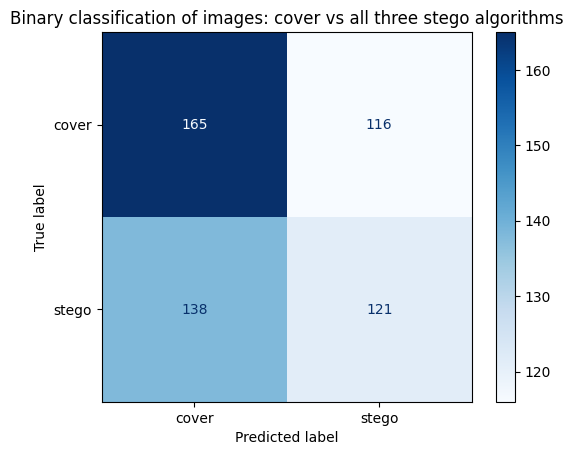

Accuracy:	52.96%
Binary classification between Cover and all three stego algorithms with 1000 images

vector shape:
(2000, 786432)
memory usage: 3.37 GB

Finished splitting the data
memory usage: 3.51 GB

Creating SVC from svm
memory usage: 3.51 GB

fitting SVC
memory usage: 11.71 GB

finished fitting SVC, testing SVC
memory usage: 11.71 GB

Classification report for all three stego algorithms classifier SVC(C=10, class_weight='balanced', kernel='linear', random_state=0):
              precision    recall  f1-score   support

       cover       0.50      0.56      0.53       308
       stego       0.47      0.42      0.44       292

    accuracy                           0.49       600
   macro avg       0.49      0.49      0.49       600
weighted avg       0.49      0.49      0.49       600




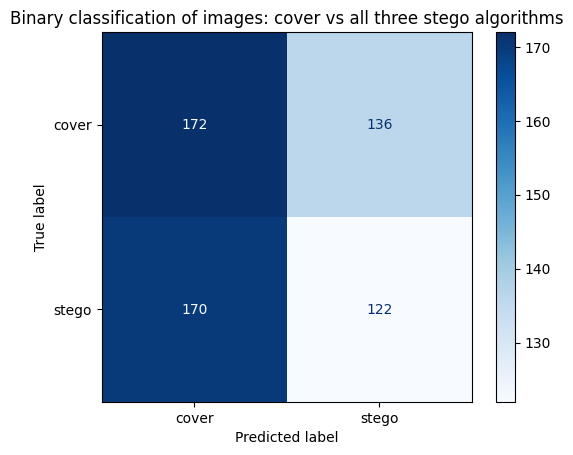

Accuracy:	49.00%
Total time taken: 6617.63 seconds


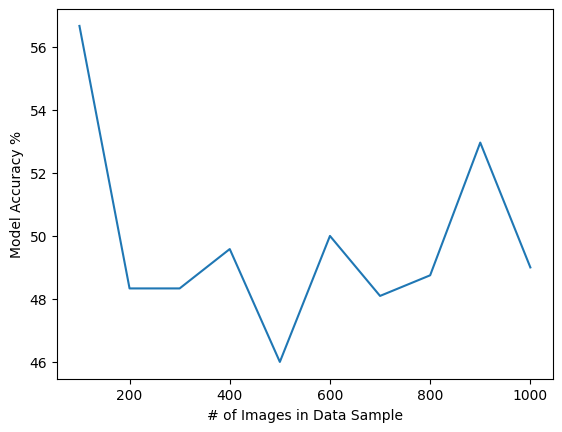

In [5]:
# starting time
start_time = time.time()
accuracies = []
data_sizes = []

# best accuracy so far: 
#      * linear: ~53% w/ ~70/30 train/test split, random_state = 0
#      * poly: 
def create_svc(kernel_in, data, labels, algorithm_class):
    
    X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state = 12, test_size=0.3, shuffle=True)
    X_train = X_train ** 2

    print("Finished splitting the data")
    print(mem_usage())
    
    print("Creating SVC from svm")
    if kernel_in == 'linear':
        classifier = svm.SVC(kernel = kernel_in, C=10, random_state = 0, class_weight = 'balanced')
    elif kernel_in == 'poly':
        classifier = svm.SVC(kernel = kernel_in, C=10, random_state = 0, degree = 2, gamma = 'auto', class_weight = 'balanced')
    else:
        sc = StandardScaler();
        X_train = sc.fit_transform(X_train)
        X_test = sc.fit_transform(X_test)
        classifier = svm.SVC(kernel = kernel_in, C=1000, random_state = 1234, gamma = 'auto', class_weight = 'balanced')

    print(mem_usage())

    print("fitting SVC")
    model = classifier.fit(X = X_train, y = y_train)
    print(mem_usage())

    print("finished fitting SVC, testing SVC")
    prediction = classifier.predict(X_test)
    print(mem_usage())
    
    print("Classification report for " + algorithm_class + " classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, prediction)))
    
    # # display confusion matrix
    np.set_printoptions(precision=2)
    disp = ConfusionMatrixDisplay.from_estimator(
        classifier,
        X_test,
        y_test,
        display_labels = ["cover", "stego"],
        cmap = plt.cm.Blues,
        normalize = None,
    )
    disp.ax_.set_title("Binary classification of images: cover vs " + algorithm_class)
    plt.show()
    accuracy_percentage = metrics.accuracy_score(y_test, prediction) * 100
    accuracies.append(accuracy_percentage)
    print(f"Accuracy:\t{(accuracy_percentage):.2f}%")

    return model, classifier, prediction

for size in range(100, 1001, 100):
    data, labels = defineData("all three stego algorithms", size)
    create_svc('linear', data, labels, "all three stego algorithms")
    data_sizes.append(size)

print(f"Total time taken: {(time.time() - start_time):.2f} seconds")

plt.plot(data_sizes, accuracies)
plt.xlabel("# of Images in Data Sample")
plt.ylabel("Model Accuracy %")
plt.show()